In this notebook, I will investigate the degree of missingness. First on the X, and then the autosomes.

In [1]:
%run ../scripts/notebook_settings.py

In [2]:
meta_data_samples = pd.read_excel("../data/New_Papio.xlsx")
vcf_dir = "/faststorage/project/primatediversity/data/PG_baboons_pananu3_23_2_2021/"
vcf_names = "output.filtered.snps.{}.removed.AB.pass.vep.vcf.gz"
vcf_path = vcf_dir+vcf_names
meta_data_samples = meta_data_samples.loc[meta_data_samples.Origin != "captive"]
vcf_callset = allel.read_vcf(vcf_path.format("chrX"), samples=meta_data_samples["PGDP_ID"].tolist())

Code burrowed from Kasper the make the callset_indexes.

In [3]:
samples_list = list(vcf_callset['samples'][:])
samples_callset_index = [samples_list.index(s) for s in meta_data_samples.PGDP_ID]
meta_data_samples['callset_index'] = samples_callset_index
meta_data_samples

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,callset_index
1,PD_0199,09SNF1101115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,0
2,PD_0200,11SNF1101115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,1
3,PD_0201,19SNM1131115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",M,2
4,PD_0202,20SNF1131115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,3
5,PD_0203,21SNF1151115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,4
...,...,...,...,...,...,...,...,...
213,PD_0790,34418_BZ11065,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,212
214,PD_0791,34419_BZ11066,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,213
215,PD_0792,34420_BZ11067,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,214
216,PD_0793,34422_BZ11070,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",M,215


Creating the gt dataframe

In [4]:
gt = allel.GenotypeArray(vcf_callset["calldata/GT"])

Testing missingness per individual

In [5]:
missingness = gt.is_missing()

In [6]:
m_per_i = sum(missingness)
total_sites = len(gt)

In [7]:
d = {"m": m_per_i/total_sites, "ID": meta_data_samples["PGDP_ID"], "sex": meta_data_samples["Sex"]}
m_df = pd.DataFrame(data=d)

<AxesSubplot:xlabel='m', ylabel='Count'>

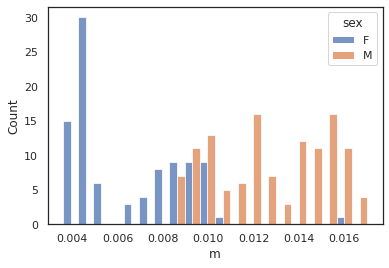

In [8]:
sns.histplot(m_df, x="m", hue="sex", multiple="dodge", bins=20)

In [9]:
m_df.loc[(m_df.m > 0.015) & (m_df.sex == "F")]

,m,ID,sex
113,0.016084,PD_0690,F


The two outliers (m=0.025 and f=0.015) are quite problematic.
m=0.025 is the captive individual. f=0.015 is an individual Kasper previously removed from the zarr.

Checking the missingness on an autosome.

In [10]:
vcf_callset = allel.read_vcf(vcf_path.format("chr7"), samples=meta_data_samples["PGDP_ID"].tolist())
gt = allel.GenotypeArray(vcf_callset["calldata/GT"])

<AxesSubplot:xlabel='m', ylabel='Count'>

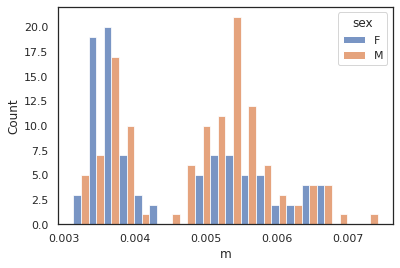

In [11]:
missingness = gt.is_missing()
m_per_i = sum(missingness)
total_sites = len(gt)
d = {"m": m_per_i/total_sites, "ID": meta_data_samples["PGDP_ID"], "sex": meta_data_samples["Sex"]}
m_chr7_df = pd.DataFrame(data=d)
sns.histplot(m_chr7_df, x="m", hue="sex", multiple="dodge", bins=20)

In [12]:
m_chr7_df.loc[(m_chr7_df.m > 0.007) & (m_chr7_df.sex == "M")]

,m,ID,sex
208,0.007416,PD_0785,M
